<a href="https://colab.research.google.com/github/JoseSavyo-collab/Fast-Fuorrier-Transform-Python/blob/main/FFT_python_scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

José Sávyo Soares Lira
savyosoares4@gmail.com

In [1]:
#libs
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack as sc

Text(0.5, 0, 'Número de dados (Tamanho do vetor)')

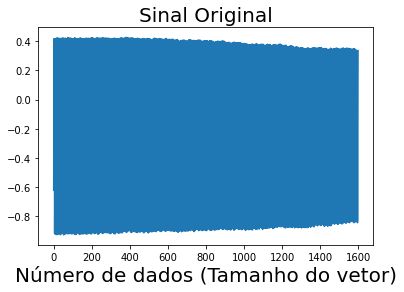

In [11]:
#sinal captado com o MPU6050 

fs = 300.0 #Frequência de amostragem

s = [-0.619089927113871, 0.0568000827701645, 0.417493563015508, 0.106173070963353, -0.558376982496373, -0.91884804777853, -0.613814056169039, 0.0528537738429203, 0.41411297247749, 0.112833366878694, -0.558068360120183, -0.9231814904193, -0.61573846476098, 0.0530209970651415, 0.421430706468669, 0.117273288135997, -0.557271670160433, -0.925128500144851, -0.619166563141629, 0.0544335070290866, 0.423144723186101, 0.115859848635487, -0.55605841792777, -0.922601849277149, -0.616515346255928, 0.0559162112106173, 0.420197321042273, 0.114316866646106, -0.555725765610672, -0.917415928246253, -0.610440057628324, 0.0556952900005143, 0.420184721559743, 0.116251512317603, -0.556183763295204, -0.925801078707105, -0.620542569514598, 0.0493938601452395, 0.417984520686554, 0.121738497658816, -0.544305211465645, -0.919594859374451, -0.622563422599098, 0.0489897268721665, 0.422292049958616, 0.124059554521966, -0.543555639673809, -0.917440217970305, -0.621474411655503, 0.0483010092820333, 0.422582390095981, 0.121560822224122, -0.55322931453357, -0.926861188775825, -0.623980085034251, 0.052258342756491, 0.419935946725569, 0.121191378119122, -0.551139553969874, -0.922504300706224, -0.620603813391018, 0.0505707995651739, 0.420717666681591, 0.119158437000159, -0.543726382145822, -0.911552882448067, -0.617942984528954, 0.0461601850939096, 0.418032483149689, 0.123665942466263, -0.542054612662337, -0.918594369537495, -0.624039900103374, 0.0454928387265595, 0.426029192863066, 0.13225308244053, -0.539901270173916, -0.918999891026748, -0.628030753721752, 0.0449394640958293, 0.420649928226547, 0.126365933637427, -0.541086011206422, -0.918552089830655, -0.622099579793805, 0.0492225737522669, 0.422612362576329, 0.125378124465233, -0.543494623107641, -0.916445638199897, -0.619670932117533, 0.0482473884172727, 0.420409791181942, 0.125758942201048, -0.544844553747437, -0.920733423952943, -0.629775846997897, 0.0404947327912332, 0.417083884995935, 0.130426530911999, -0.535093495983376, -0.918117797358099, -0.628461019555561, 0.0373646584462837, 0.417553832705134, 0.129850616034333, -0.536260474343346, -0.917278113287862, -0.629659074474246, 0.0399810643905626, 0.423528292999607, 0.133515295677791, -0.54162739928048, -0.924644004579535, -0.631195821668147, 0.0423418193655491, 0.420521757717412, 0.130428040901529, -0.541851819444817, -0.921902902725684, -0.630137140406724, 0.0394183862759541, 0.418103176638006, 0.12989120715073, -0.53211569921159, -0.912354053667067, -0.628451407579199, 0.0356609275177474, 0.417003417166789, 0.132685637613304, -0.535666155453506, -0.918903056859471, -0.635375083012395, 0.0342008082333802, 0.419356467947883, 0.134731965682455, -0.537402968141906, -0.923878943217682, -0.640068260363123, 0.0346220750166844, 0.422994243799393, 0.137972760415601, -0.532074750893369, -0.917573941344164, -0.632676455702742, 0.0363903092882873, 0.419364748535628, 0.132370894096761, -0.536260149614415, -0.920744984302893, -0.635409634170672, 0.0324445178977771, 0.418612611385236, 0.135058180248492, -0.53470992616987, -0.919998952056407, -0.635922056424069, 0.0295764632682826, 0.415448127950917, 0.139427205061896, -0.52563985744738, -0.917183812006248, -0.639459458562952, 0.0270685025801261, 0.417284177800685, 0.13943365093118, -0.528155824733246, -0.919363392592308, -0.640790652343419, 0.0292221129699149, 0.421750044899589, 0.144198073809408, -0.530011228427312, -0.920886566116886, -0.642479502568684, 0.0308079429417641, 0.419806899448319, 0.139547841859828, -0.527286038291089, -0.919363587429667, -0.639627798040874, 0.0285906633563506, 0.420153839838388, 0.14031361762533, -0.522440920273463, -0.909473448264383, -0.634709063974551, 0.0282564158083785, 0.419050930496539, 0.144888236443285, -0.522443518104912, -0.917131205919398, -0.643470964941353, 0.0254283982265424, 0.421256132195269, 0.149570161936547, -0.520854359661519, -0.921013729966335, -0.644499186629032, 0.0280032835178586, 0.424207593450736, 0.148748289248185, -0.51875800710052, -0.913702328189314, -0.640179837223875, 0.0301550936916352, 0.42307097724583, 0.146964991613287, -0.520034224272938, -0.912817311960284, -0.63824445279406, 0.0247573154469279, 0.418350262881739, 0.146698665180383, -0.524323114104351, -0.91832601354877, -0.648069191552605, 0.0195261698236983, 0.417128470278185, 0.149486933911487, -0.514088567434661, -0.91375863618598, -0.645396087936943, 0.0216006315956243, 0.42213981703568, 0.151200284934609, -0.513792804324145, -0.913081641310262, -0.643418293908716, 0.0202059086588844, 0.424085105697896, 0.153342732767389, -0.519986521592948, -0.922276730671255, -0.647541701876801, 0.0244106429582267, 0.419975693546745, 0.148994222704212, -0.518218015360865, -0.917799303222401, -0.648457827137438, 0.0233316377248236, 0.421830317891376, 0.152964780764392, -0.511307588868061, -0.909857472698393, -0.644729679224381, 0.019917518924662, 0.420791769823686, 0.156378785909428, -0.507439158056737, -0.911264782940327, -0.648954922185283, 0.015960289972329, 0.422773720382231, 0.162816601915797, -0.507308519607724, -0.917038268499295, -0.651311090364117, 0.0179970679665699, 0.423226262620719, 0.162274337073624, -0.504452593603809, -0.912866475920464, -0.648100755204716, 0.0205400526995097, 0.421266263737921, 0.154320816308094, -0.506711213211717, -0.910451207076157, -0.64575134138765, 0.0179458521254558, 0.421817296261235, 0.157231166880874, -0.506876889912404, -0.910558172786086, -0.653409488717383, 0.0155489791750991, 0.421586543882741, 0.162262825433014, -0.502447879547188, -0.912840887280688, -0.657252980346793, 0.0102513990864402, 0.420270709780719, 0.164194540425906, -0.500506617523719, -0.911096118733474, -0.65233820797343, 0.0118959329456008, 0.421126922553553, 0.16135645827676, -0.504600312794602, -0.915164192891686, -0.65719816610321, 0.00995062906171664, 0.415189611248807, 0.156863541257889, -0.511749122795783, -0.918361149219123, -0.659661624720905, 0.00505574633538817, 0.416774645634775, 0.160413721480213, -0.502038818512585, -0.910685206743963, -0.657804759746649, 0.00653060831323089, 0.416770131902632, 0.160373731112339, -0.499139898398182, -0.910245263988004, -0.65632471022413, 0.00496031408379377, 0.419273662070433, 0.167035204170056, -0.502318832269939, -0.919035481317605, -0.665189095641612, 0.00705184898666539, 0.421519941978957, 0.166263096190397, -0.500951885834149, -0.919140303816589, -0.667655217036543, 0.00218089903625913, 0.416860503964178, 0.162026731263602, -0.501212156072488, -0.910045945370048, -0.655697398874883, 0.00550563645180876, 0.418044660484608, 0.165721448333194, -0.499413644887164, -0.911127227765081, -0.663486801638597, 0.000916106423821445, 0.417214393553375, 0.175117674794157, -0.493314001589723, -0.91591353737327, -0.671406225866354, -0.00441709585777501, 0.414028900157208, 0.168511811565904, -0.493565569092705, -0.912268065446092, -0.663388733501381, 0.000197944846504939, 0.421963781482089, 0.172388798984565, -0.493828502108279, -0.910903814260431, -0.660827076854899, 0.00483755183352919, 0.42357895071287, 0.175690301791395, -0.49338917633729, -0.9134192944529, -0.666723309949851, 0.00208469086010535, 0.420458630413191, 0.171437927728293, -0.488483301536641, -0.90538537080401, -0.663679820515288, 0.000673719362895306, 0.420530752708805, 0.177322795310654, -0.480496561001451, -0.901120381021932, -0.659349365380685, 0.00315560793302462, 0.422914652738362, 0.183098407844121, -0.483707350781356, -0.905377317526517, -0.66255515433505, 0.00357087737888116, 0.427465923546165, 0.182781082732574, -0.485182919044624, -0.909545538087104, -0.664406174188545, 0.00268207856519226, 0.425237633620429, 0.181723895224235, -0.481240222726739, -0.902800593457628, -0.660609638362583, 0.00386309510907431, 0.423020222113887, 0.182954309380911, -0.473533333584438, -0.895891855555266, -0.658589239898586, -0.00059743362378733, 0.420333642247581, 0.185469903228506, -0.474546974943107, -0.900298167368192, -0.66307218773927, -0.00137274005657161, 0.422624572384141, 0.187685447543693, -0.480086136105337, -0.910651499880906, -0.673570739030007, -0.00426140304955536, 0.422433794137075, 0.184932590502534, -0.479554522372107, -0.90665837316001, -0.670121793051976, -0.00403049820068005, 0.422582974608058, 0.179352838223907, -0.479719289831786, -0.902769029805517, -0.664531649447552, -0.00798327354646081, 0.417902007065142, 0.183819419726459, -0.477626054668526, -0.904719741440883, -0.673881569562929, -0.0124897109588148, 0.415553762272229, 0.184290666351383, -0.476085670510595, -0.90699219450126, -0.676111223350176, -0.0139952202443153, 0.418138604564397, 0.190552787769539, -0.475460437426507, -0.910780352320798, -0.677998028331887, -0.0131988215258259, 0.421186867514249, 0.18864318681686, -0.476159286559293, -0.905365432447636, -0.670363910943062, -0.0124867873836563, 0.416957695333279, 0.185362791390557, -0.475903465107312, -0.906693249047218, -0.675328756517613, -0.013748942778577, 0.416002310344864, 0.186461868931019, -0.473969444539008, -0.907045190262828, -0.68195601938243, -0.0199970957788027, 0.414507160927046, 0.188971731312978, -0.468498801181257, -0.90256178780164, -0.67904014841782, -0.0160246532760441, 0.416481058208098, 0.191678639210376, -0.469919652619621, -0.905210861476395, -0.679447098714371, -0.0172508936511766, 0.418180429650733, 0.19183371351146, -0.475203414477481, -0.912137459469972, -0.682064219062298, -0.0183145554425816, 0.417435533955506, 0.191174935928781, -0.470329428057873, -0.905307370914741, -0.679849827534817, -0.0198067985364656, 0.414493132637219, 0.191029083929343, -0.464026082301905, -0.899362688263257, -0.680637684867638, -0.0227035916763692, 0.417835632471609, 0.19432134819808, -0.463068359265184, -0.904800923673678, -0.683051719742008, -0.0197290178392254, 0.419245735382352, 0.200224027162316, -0.467203262637433, -0.913194127412022, -0.69121033930047, -0.025034386348343, 0.416652027990363, 0.193674390748497, -0.467387448887197, -0.906971281958092, -0.685294557523861, -0.024356561384295, 0.416407604523866, 0.192713258057999, -0.467684705750796, -0.902625044997434, -0.68491157222243, -0.028658099407577, 0.410594404616615, 0.193036655600558, -0.466744225820321, -0.906547056082402, -0.68990057762946, -0.0299821491515578, 0.411134526247842, 0.193981746681855, -0.458904619963847, -0.903346722574081, -0.69095432301113, -0.0310891805212773, 0.418103793622975, 0.203935776264348, -0.454828589946821, -0.898045587718404, -0.684541576078247, -0.025304248267486, 0.421425640697343, 0.206010290804726, -0.457635416936342, -0.902586142471478, -0.686329793356453, -0.023399546662556, 0.418449305205748, 0.20049106799887, -0.461241466771276, -0.904644534220423, -0.686151712010595, -0.0250497500858993, 0.417189259534102, 0.205601505789714, -0.451874238603867, -0.894544100599309, -0.686237895068929, -0.0313240102774138, 0.412366872541658, 0.201078551344709, -0.450672968868764, -0.896284452833059, -0.685474652189091, -0.0298290983176267, 0.41841277320099, 0.207750139708632, -0.452470798123332, -0.900469948972785, -0.687827832861758, -0.028737221641214, 0.418064501422303, 0.20866998311553, -0.45394428812144, -0.903547664836693, -0.690639725622605, -0.0299003925544666, 0.415663163449142, 0.207898427175054, -0.446892052504391, -0.89874193643842, -0.688497099188914, -0.0318468806841716, 0.413246725580682, 0.204090542072947, -0.447042466945312, -0.891230371748221, -0.685935897162935, -0.0365866322818536, 0.412604346809028, 0.209832902363861, -0.445168586175063, -0.897567846514856, -0.693573911298934, -0.0384251216577166, 0.414840527647792, 0.213895147637759, -0.446665196873071, -0.901380099221087, -0.696160247344186, -0.0342981984989518, 0.419758190108642, 0.212804642941081, -0.446408661017441, -0.89818418202623, -0.691858952867602, -0.0374752164700145, 0.412909592004334, 0.206725084128032, -0.443045378531455, -0.892405890479081, -0.690181013534425, -0.0378248724057709, 0.412377069030097, 0.209994763499606, -0.442096488121663, -0.895527574640271, -0.692824631763136, -0.041081099881371, 0.413749438439037, 0.216826930319997, -0.439562433434331, -0.899286636747576, -0.699378116214791, -0.045217383351577, 0.411311600934013, 0.214776916577477, -0.441556041761505, -0.900017601571655, -0.699447413368704, -0.0443825986290888, 0.412889328919029, 0.214020200749155, -0.441372634861177, -0.898154371910348, -0.696808471236601, -0.0418190747912521, 0.414566001809375, 0.211504006153038, -0.445336535978267, -0.901410104174328, -0.701766822232528, -0.04337398245063, 0.407981083597183, 0.211206213486702, -0.440900706305497, -0.90092495915115, -0.708054548526908, -0.0517208311340487, 0.40775763761964, 0.210640795471736, -0.440631635913124, -0.898791944693821, -0.704076878903135, -0.0533981047729173, 0.409857140051271, 0.21642538676015, -0.44051129137123, -0.902891062937854, -0.707368785970048, -0.0514921083113742, 0.411383106244658, 0.215717964783581, -0.446147026917592, -0.908982588012016, -0.715881879629783, -0.0579022858265886, 0.401879979019551, 0.207677514083174, -0.44260598781468, -0.902898206974339, -0.711044197904681, -0.0590882567699214, 0.40049010672122, 0.21359633207529, -0.43526471097599, -0.896283413700479, -0.706404405990239, -0.0572018374038167, 0.40467355706868, 0.215905771760927, -0.438152492888054, -0.905222551717918, -0.715727243712756, -0.0592407129439973, 0.40613925357244, 0.219089040763915, -0.433298249987462, -0.90262751293731, -0.71523326606265, -0.0598181784023093, 0.40845184312871, 0.216183577361549, -0.436240294103925, -0.896667438134489, -0.707312477973382, -0.0561007181302004, 0.407752896577245, 0.215679208385645, -0.436284522184351, -0.901008934052752, -0.708468448022586, -0.0556525394367249, 0.404486967824826, 0.216407023339092, -0.432221448851679, -0.899803605206009, -0.717294255643044, -0.0652102657724977, 0.401798179801787, 0.216591485608447, -0.430314478203343, -0.899696509604507, -0.719314394323896, -0.0679273417445531, 0.402402954963211, 0.223409867685709, -0.427904664805078, -0.899502451595236, -0.715792968848427, -0.063266365326463, 0.409945498793444, 0.227779095454695, -0.429144155135381, -0.894607292849316, -0.711132978794465, -0.054807115782629, 0.410029278857688, 0.224192691720097, -0.42630618664136, -0.897431850038479, -0.713710352321216, -0.0629792075326233, 0.407462523966986, 0.223743932573657, -0.423468250620232, -0.889177825120037, -0.709120763499534, -0.0655171589671298, 0.404601759501997, 0.226957823514855, -0.422607946262865, -0.895018269784614, -0.716414629914272, -0.0655372881017511, 0.406141624093638, 0.227534168658355, -0.429518600065921, -0.903956628452618, -0.72324666684309, -0.070756826695247, 0.404138371317207, 0.225573877519519, -0.42455531319024, -0.896438439292223, -0.716553484005243, -0.0664811167993285, 0.404199420356268, 0.224681116505481, -0.419901980079368, -0.89006485466844, -0.711582533526786, -0.0664118521183085, 0.405017964573086, 0.230616641801105, -0.414639682803859, -0.88757924953764, -0.713959289519857, -0.0686785777721611, 0.407997742191352, 0.236346256481471, -0.414778082274327, -0.897873091710163, -0.72626898395134, -0.0694014081365144, 0.408425020518995, 0.234475931493017, -0.414560124215721, -0.894394985074112, -0.721169635653496, -0.0727683357047528, 0.406878369092692, 0.234610726472349, -0.41420431872583, -0.890287293986297, -0.720488549193245, -0.0724852289043294, 0.401406881439719, 0.229779912764142, -0.419544485999035, -0.897489781679801, -0.724410040711924, -0.0748209635151688, 0.399228307513346, 0.23117455857776, -0.413081276190248, -0.894390698652221, -0.72975105228035, -0.0818709828572626, 0.402554441009605, 0.234189293265467, -0.409429244738659, -0.891256804683218, -0.727759165016511, -0.0770095228561755, 0.40337149147334, 0.235423230731047, -0.414406040337877, -0.895884776464566, -0.729770600962007, -0.0815224025860907, 0.402277057556594, 0.235275738850506, -0.413476243989238, -0.89759538352822, -0.728586704224722, -0.0752712164146922, 0.403318333347306, 0.236667137374813, -0.407066127360698, -0.888080306278446, -0.720714625475131, -0.0791521655263138, 0.398401385290104, 0.233154934200989, -0.407144451978898, -0.885533067596507, -0.725186662423727, -0.0830253454982569, 0.403184999648165, 0.24024155861185, -0.40649723474617, -0.894467919192055, -0.734295373889027, -0.0818028547275017, 0.402593830628957, 0.242685452311441, -0.40575022831289, -0.895710916594814, -0.73266744281125, -0.0832828798953501, 0.402368598642293, 0.238823240059149, -0.406049920643473, -0.892023229906582, -0.733514465755332, -0.0868581535458315, 0.397911369332958, 0.235974717874865, -0.406715387642134, -0.889605428176611, -0.73159181069962, -0.0904679296452505, 0.392064397616865, 0.236988245578407, -0.40520465123562, -0.893914516147543, -0.738182314249428, -0.0958795697562074, 0.395278402213189, 0.239960002392073, -0.400725859925255, -0.8920788234996, -0.73879851986923, -0.0949134037672767, 0.396974331529154, 0.246302721530947, -0.400596812648005, -0.889171330541414, -0.732991392392993, -0.0874870398303954, 0.400701180526485, 0.24498219509587, -0.402202662158461, -0.889808578595956, -0.735428353129903, -0.0876100227948554, 0.399402329747564, 0.244081234676319, -0.397592095847825, -0.887964053321084, -0.731091922982966, -0.0890946591135265, 0.399280329088121, 0.245804457458949, -0.391693459758782, -0.880642714838769, -0.730765960081851, -0.0937517184888843, 0.397092760170354, 0.246933686080671, -0.391775388868118, -0.883934037393606, -0.732765705785825, -0.0901041520600996, 0.402610229439982, 0.254169766982105, -0.391987436860176, -0.889444297680961, -0.738785595657769, -0.0914296630842707, 0.401865561055007, 0.251012167801127, -0.393542271455545, -0.887178793819712, -0.736696484551935, -0.0942308397903893, 0.39942353454677, 0.248520327874848, -0.392426827576952, -0.882842558510134, -0.730334200494958, -0.097245477059417, 0.393881548242838, 0.246821540944289, -0.391452381000276, -0.888123690063651, -0.742456071712648, -0.102933656328164, 0.390678097336778, 0.248081619088828, -0.391576102723055, -0.892050442191015, -0.750369910602789, -0.106782165019561, 0.390937101132284, 0.247604543579589, -0.391166554595054, -0.889534182649111, -0.744543689065399, -0.106318354687161, 0.393352889542882, 0.246531590481641, -0.394597705427656, -0.888905052817849, -0.746225070525247, -0.104869479142036, 0.38850322532022, 0.243830478995664, -0.396811967063565, -0.893427747479709, -0.751649732266344, -0.109328551288055, 0.386122572579976, 0.247259161888389, -0.388433311181338, -0.886523490836597, -0.748012703291376, -0.111688047938433, 0.38842041944277, 0.252624641781779, -0.383289832221747, -0.883044345067967, -0.749511002579826, -0.112577334352908, 0.392435205583376, 0.252568983242976, -0.391936811619806, -0.894597031415091, -0.750583062673214, -0.109194576249275, 0.393214002979018, 0.251775167134267, -0.387531668831032, -0.887886767835464, -0.748846802023997, -0.10980876043148, 0.3889591122667, 0.253553058032461, -0.381718533869568, -0.882182904159341, -0.744876081599351, -0.113518926479972, 0.38891985253892, 0.252442403905603, -0.38101289790212, -0.882947705738049, -0.750117271494333, -0.113865136229946, 0.391017731325896, 0.253740280497731, -0.381818485434584, -0.889166004986943, -0.758728303399711, -0.117764213334151, 0.389102739872959, 0.254604984932115, -0.380561881889609, -0.887801494018137, -0.75242576946607, -0.114467540870173, 0.389673386023716, 0.253937407195402, -0.383834337693544, -0.885748038148947, -0.752802195243091, -0.115954490882478, 0.386144459309937, 0.250654608775008, -0.385686039477795, -0.891002736767466, -0.758948014994546, -0.122829846650715, 0.380797018108674, 0.250215218058233, -0.380509892787727, -0.88472098548542, -0.757901478595148, -0.126770618949683, 0.384911755814296, 0.257128908076795, -0.376088935700005, -0.886018017782327, -0.760522430744464, -0.124368452917748, 0.383236803987286, 0.257167615765391, -0.380499598880609, -0.894766864646096, -0.768411070669545, -0.128725722543843, 0.38186833132552, 0.251893076209177, -0.386081916517792, -0.890511811569312, -0.761272229846551, -0.127783545904703, 0.380860535087612, 0.250449445036291, -0.381638001094636, -0.885173267940763, -0.760507817942561, -0.129951566140813, 0.375498513557339, 0.252189618669128, -0.382202834597525, -0.891761433442267, -0.76771712494362, -0.136012168902504, 0.375778040221296, 0.250549558965772, -0.378180287435464, -0.8886533229504, -0.769411300723357, -0.134776802629627, 0.378356842555345, 0.256608026634741, -0.377063674532719, -0.890103042790747, -0.765488575234739, -0.129638835943643, 0.380017473836491, 0.255710800597899, -0.379536128141807, -0.892858562609142, -0.771691417386509, -0.131900508003504, 0.3805581475069, 0.254883066552329, -0.373435088509961, -0.883841035027717, -0.763915783129477, -0.137008721401169, 0.373438498163739, 0.255947690353192, -0.370348247763086, -0.882176604418076, -0.767080136672224, -0.138139703559119, 0.377616850266979, 0.260653077511733, -0.370971402582015, -0.888263453395629, -0.773214331127942, -0.135249486180072, 0.384203879217224, 0.262495946669055, -0.370476093543291, -0.887439356314089, -0.770521419047478, -0.137916338763809, 0.378923234757104, 0.2596581405395, -0.373636810122008, -0.883501498457278, -0.767103127480551, -0.136969396727604, 0.375417915836621, 0.260499643091751, -0.370613064206461, -0.886517775607408, -0.770684497916715, -0.141595874755868, 0.374880197199485, 0.263356186080636, -0.363241912306103, -0.876932946583217, -0.766049382098882, -0.140031639257942, 0.379782824710822, 0.269589617697722, -0.361868276454332, -0.879384130447313, -0.768411460344263, -0.139121635137658, 0.379448451330389, 0.266493911851026, -0.3650273369155, -0.88947157491118, -0.778130597254389, -0.140774537870242, 0.378992954058627, 0.268036634057261, -0.36210240601371, -0.881485061686242, -0.770670729410033, -0.144404503990957, 0.373475777045038, 0.262729215696766, -0.363526796997425, -0.879675347352793, -0.771863978340536, -0.147057198393295, 0.371366597691257, 0.264801684444877, -0.362287339140016, -0.882596024305584, -0.777866332850197, -0.150142155712369, 0.376857049513811, 0.273112390798256, -0.358380265585881, -0.880849826951074, -0.778016682345332, -0.146281226139355, 0.379182920483366, 0.27372707019208, -0.355707681536508, -0.878499309055642, -0.773247193695777, -0.146556742401012, 0.375165504038417, 0.269576498648903, -0.359042452822337, -0.878911844689809, -0.775287270733003, -0.14656198677325, 0.377949794840114, 0.272589349908809, -0.352157842279561, -0.876374542713165, -0.776345692211282, -0.151656269299768, 0.370384779767844, 0.270301634588667, -0.350198915002236, -0.874112740761732, -0.773063137337586, -0.153149210560854, 0.372032324473063, 0.274040043935949, -0.351693220124833, -0.883088767985752, -0.784667780313698, -0.151441688422046, 0.376525761058224, 0.277306135052833, -0.346740194683378, -0.879587215920871, -0.779433994238347, -0.149974741711901, 0.3755826832963, 0.274236212683273, -0.349622261366252, -0.872935988060933, -0.771419294542182, -0.14758001197249, 0.375611714062747, 0.27571187836522, -0.348284767844521, -0.872852857454551, -0.776516954249584, -0.152730910988158, 0.371971665108719, 0.278182610910973, -0.342022143096521, -0.873701698880648, -0.78231219664694, -0.157120970118079, 0.374782258953842, 0.280205866989564, -0.340660976835707, -0.867655765748423, -0.778231133331481, -0.154588181873578, 0.379841146026861, 0.283510795686617, -0.341808958553204, -0.870321075869737, -0.775813071818365, -0.151496616320755, 0.379965679571968, 0.285619747730146, -0.342231528311344, -0.870700813881856, -0.776954948631956, -0.151424185532656, 0.375574045506731, 0.281319687223501, -0.338841553107216, -0.869863143130991, -0.778472926493635, -0.159153188715171, 0.370981956272278, 0.283384541078176, -0.335542209747779, -0.86782092288282, -0.78157382800323, -0.162555536091577, 0.370250309517443, 0.283755186680221, -0.340486564926772, -0.876902941629976, -0.789555015673697, -0.161089693459798, 0.371566338456824, 0.281491273990735, -0.339413043553194, -0.878543017569779, -0.791141381448283, -0.163572213665752, 0.372797710563847, 0.280535304490243, -0.340652079262993, -0.871038077349776, -0.779562846678238, -0.164148152898088, 0.364017559831113, 0.274318239211288, -0.345399876019945, -0.876055723848536, -0.790640519544836, -0.170741579008277, 0.360689120759442, 0.280051848057507, -0.338581023085733, -0.87434083036299, -0.793224972162287, -0.172044586317518, 0.366358108548357, 0.285723466150764, -0.331229289975459, -0.869474182817228, -0.788689028560035, -0.169385673356148, 0.368571883090869, 0.286282974099182, -0.335966695406613, -0.875474588953302, -0.791824156498976, -0.166302826775126, 0.36853064251661, 0.283241400565313, -0.33768545316644, -0.875928235270156, -0.790856399338282, -0.172888167134929, 0.363623728583381, 0.281549432942309, -0.330629970260079, -0.868976113582589, -0.792048609136205, -0.177595324066144, 0.35780468355537, 0.281559369647603, -0.333667582100987, -0.877967532957947, -0.801259025702749, -0.181514380117839, 0.358808940247927, 0.285120541944248, -0.330118976813979, -0.874528134010493, -0.798968972334303, -0.179553439521141, 0.362171540803158, 0.282688517087091, -0.336455120191996, -0.872430579952449, -0.794410882218945, -0.179491481241073, 0.359984556397467, 0.283957362912772, -0.333489435809344, -0.877409713599971, -0.798359196347339, -0.18207892136469, 0.355517780057556, 0.276620112712829, -0.335198938794632, -0.874070396109106, -0.798466032165696, -0.186609750486276, 0.352352614692481, 0.280778623878374, -0.330512743115924, -0.87401564681131, -0.800693023175708, -0.184465597826608, 0.356249751541322, 0.282384343497258, -0.332283197721594, -0.879022966930058, -0.80840189316449, -0.186839350077065, 0.355412990031465, 0.282543687983786, -0.327922153121674, -0.872518126872294, -0.800007325564635, -0.186452792757392, 0.353403534932449, 0.278788522623656, -0.333544347471606, -0.875137780105885, -0.805786526352791, -0.191532186462415, 0.349297987055579, 0.277029206220326, -0.335092914798602, -0.876852218970927, -0.807984356704782, -0.193736121718313, 0.34873763481194, 0.28120593467891, -0.327250386381748, -0.869598943672586, -0.805051924564682, -0.195675727624233, 0.350847788352514, 0.288203485943949, -0.325855026164481, -0.876982565163901, -0.815156319878757, -0.196250579014649, 0.354848189001469, 0.288854534978065, -0.32388885743199, -0.874504493744304, -0.805838612873351, -0.19540519595167, 0.3517655697307, 0.285833873987364, -0.325367218364067, -0.866033679791408, -0.798475254467342, -0.191081949799338, 0.349114255426319, 0.28388985176798, -0.326397063696401, -0.873975315478058, -0.81088353660233, -0.198190623304626, 0.348534029772092, 0.287576564269418, -0.317327611958881, -0.866325156480032, -0.804179507818182, -0.19758868952135, 0.354270496232905, 0.291584498629577, -0.317508745756691, -0.864600261343407, -0.803057439469393, -0.194348804029211, 0.354304690189358, 0.294154533282484, -0.318572460316548, -0.871791513415893, -0.808329998179127, -0.194429190676124, 0.355500666842883, 0.293028308403376, -0.313419986365563, -0.859477012996228, -0.798473890605831, -0.195863550838026, 0.353043085818843, 0.295075691841553, -0.310002668985429, -0.857671455193098, -0.798945007339182, -0.195679250933136, 0.352441038380441, 0.297239328237092, -0.31131525579814, -0.864308394980065, -0.809437258888654, -0.200691458222299, 0.353152324631291, 0.304683251890927, -0.302324778136682, -0.857517144005003, -0.805919145648283, -0.198537011655513, 0.355889757048219, 0.300116556458892, -0.306810940793784, -0.857837196839571, -0.801138875998214, -0.193411993535659, 0.354876667728733, 0.29994727526707, -0.308884789639853, -0.86251153991229, -0.809504347885836, -0.19749224502879, 0.356301773116096, 0.300238492172549, -0.30417031007124, -0.856531202024163, -0.809439986611676, -0.207069653996904, 0.345914603848753, 0.298502426360691, -0.302110034894494, -0.856434108073741, -0.809186438262213, -0.207323397183726, 0.348748805487173, 0.300382736763778, -0.305791908934858, -0.867198222684395, -0.822204236601021, -0.209420188128782, 0.349875420040998, 0.299766401252404, -0.304469482835533, -0.863190807890526, -0.812014697361192, -0.207186540175681, 0.3507223455664, 0.299789619370983, -0.305119265426818, -0.858463209273094, -0.812356961654652, -0.210573462927857, 0.345297813716876, 0.297089270997995, -0.306868060612778, -0.867414751935704, -0.821132566182351, -0.212613702329549, 0.343891380243055, 0.297146520708562, -0.301591215481153, -0.859993331996799, -0.816642993871471, -0.216240599761864, 0.344821728630877, 0.302036288954224, -0.303789857655473, -0.864207923848759, -0.820321133529126, -0.211538849567353, 0.352282862918064, 0.306476502467565, -0.298452028430572, -0.862727744434668, -0.819408125666229, -0.213662852796842, 0.346928732300819, 0.305122317878771, -0.29724169875829, -0.851027501261218, -0.807175262099862, -0.210058036931846, 0.345671804026912, 0.301423557933986, -0.296102387303255, -0.849151996846312, -0.809971567872013, -0.20887886500051, 0.349477594627413, 0.309330642462359, -0.289095256534747, -0.85277402334466, -0.818773605334709, -0.216295754970824, 0.349663209684474, 0.315403917770589, -0.283263547078419, -0.848256978966202, -0.810543415519816, -0.211135065377881, 0.353703032425674, 0.314779366617256, -0.287363119942956, -0.849671563136195, -0.812566281923689, -0.209439574445973, 0.351221161677581, 0.312608943387056, -0.290654507443579, -0.854399031862056, -0.816759441666191, -0.21608359332364, 0.348968322244648, 0.314193360788054, -0.28116927278258, -0.846161827902249, -0.811455838870636, -0.218466681530868, 0.345738211093338, 0.31352942001537, -0.281498905120618, -0.844399069372248, -0.812617654040601, -0.218182348878729, 0.346717366239516, 0.317448605958637, -0.282183531126218, -0.850453835131401, -0.820743800705946, -0.215886515335308, 0.3512876012169, 0.317988500279612, -0.278935040317403, -0.850418050003185, -0.814468868731455, -0.213505050772736, 0.354104267493036, 0.322744739988775, -0.273250400594006, -0.837137351121696, -0.807151167213169, -0.216088512966947, 0.350212456198666, 0.317817692861813, -0.278833432634838, -0.842619814612543, -0.817117552731493, -0.221592100074767, 0.34714737229018, 0.320176069197379, -0.273439262940378, -0.846851617097855, -0.81767465768582, -0.216897428970955, 0.353094555354434, 0.326293929787859, -0.268449348292341, -0.838858349511148, -0.814968756448109, -0.220233369280936, 0.351674548211291, 0.323204263899283, -0.274051896541937, -0.838382881410119, -0.809856873613521, -0.217888290595102, 0.350666816919169, 0.32499624803309, -0.274767014594175, -0.843201988640357, -0.8149801219607, -0.218731400555563, 0.349439179194855, 0.32339390559509, -0.267906953558596, -0.836133354212283, -0.814926346849697, -0.223688241561961, 0.346539155002086, 0.323364615045498, -0.266347312975046, -0.833852003579193, -0.815379798329192, -0.229017173214147, 0.345153536652754, 0.327752482255134, -0.264985497256369, -0.83652296398391, -0.819920742756985, -0.225477189480261, 0.349396055192794, 0.328905107596346, -0.269931297479106, -0.843499115612384, -0.820155197045294, -0.220815754382555, 0.347967572624547, 0.322548181566733, -0.268084758884862, -0.838035031779042, -0.819170164305462, -0.229560249878647, 0.341826786171525, 0.323294148867433, -0.26665742910432, -0.835416417678031, -0.817823968048375, -0.232662645141325, 0.33450148599625, 0.322950942860072, -0.266694886586531, -0.843117299335106, -0.828275758373023, -0.237549474590161, 0.336302172865412]
n = len(s)

plt.plot(s)
plt.title("Sinal Original", size = 20)
plt.xlabel("Número de dados (Tamanho do vetor)", size = 20)

1599 799


(0.0, 100.0)

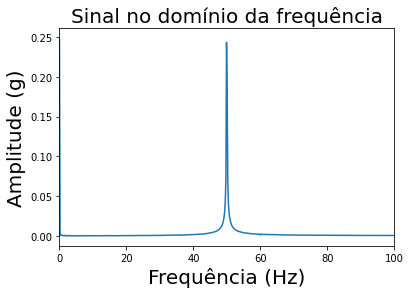

In [12]:

#primeiro método

fft = sc.fft(s)

amp = np.abs(fft)[:n // 2] * 1 / n
freqs = abs(sc.fftfreq(len(fft))*fs)

print(len(freqs), len(amp))
plt.plot(freqs[:len(amp)], amp)
plt.title("Sinal no domínio da frequência", size=20)
plt.xlabel("Frequência (Hz)", size=20)
plt.ylabel("Amplitude (g)", size=20)
plt.xlim(0, 100)